# Polynomial Linear Regression

## Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset

In [3]:
# dataset '50_Startups'
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## No missing values

In [6]:
# count missing values
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

## Select independent variebles

In [20]:
X = df.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

## Select dependent variable

In [25]:
y = df.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Split dataset into training and test sets

In [11]:
# import library split
from sklearn.model_selection import train_test_split

In [23]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]], dtype=int64)

## Lineal model

In [15]:
# import library
from sklearn.linear_model import LinearRegression

In [26]:
# train model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Polynomial Model

In [27]:
# import library
from sklearn.preprocessing import PolynomialFeatures

In [30]:
# x variable created a polynomial way, thats why we use fit_transform
pol_reg = PolynomialFeatures(degree = 2)
X_poly = pol_reg.fit_transform(X)

In [31]:
# create again a lineal model but now with this 
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Plot Lineal model

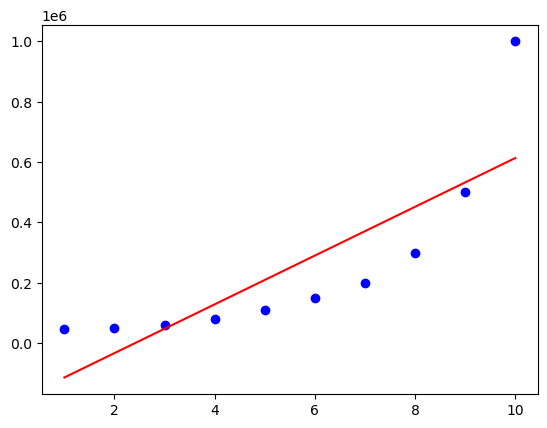

In [32]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin_reg.predict(X), color = 'red')

## Plot polynomial model

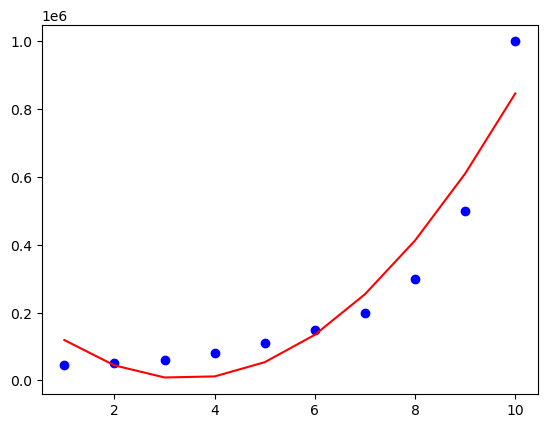

In [34]:
# polynomial model
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'red')

## Retrain the model to a higher degree value to have a more aproximated value

In [35]:
# retraining
pol_reg = PolynomialFeatures(degree = 4)
X_poly = pol_reg.fit_transform(X)

In [37]:
# create again a lineal model but now with this 
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Re-visualize the polynomial model

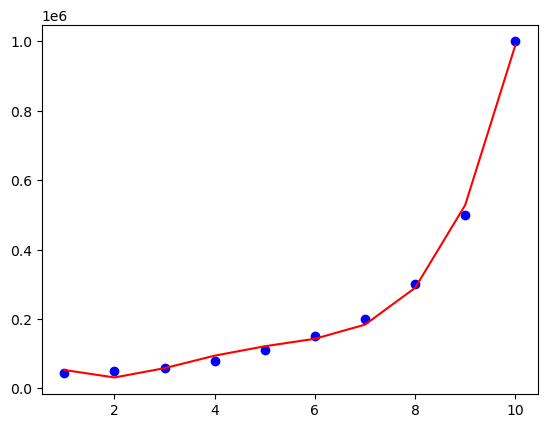

In [38]:
# polynomial model
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'red')

## A more smooth graph

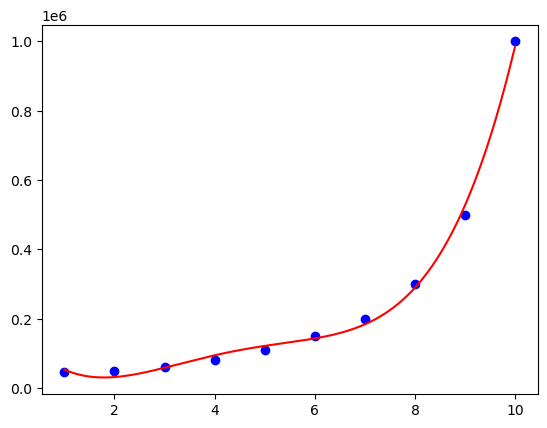

In [44]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))


# polynomial model
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, lin_reg_2.predict(pol_reg.fit_transform(X_grid)), color = 'red')